# Estimación de ocupación de habitaciones - Análisis Exploratorio de Datos (EDA)

## Se carga el dataset.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
file_path = '/content/drive/My Drive/Mlops/data/Occupancy_Estimation.csv'
df = pd.read_csv(file_path)
df

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10124,2018/01/11,08:58:07,25.06,25.13,24.69,25.31,6,7,33,22,0.09,0.04,0.06,0.08,345,0.000000,0,0,0
10125,2018/01/11,08:58:37,25.06,25.06,24.69,25.25,6,7,34,22,0.07,0.05,0.05,0.08,345,0.000000,0,0,0
10126,2018/01/11,08:59:08,25.13,25.06,24.69,25.25,6,7,34,22,0.11,0.05,0.06,0.08,345,0.000000,0,0,0
10127,2018/01/11,08:59:39,25.13,25.06,24.69,25.25,6,7,34,22,0.08,0.08,0.10,0.08,345,0.000000,0,0,0


## Librerias a Ocupar

In [ ]:
# Importar las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [ ]:
df.shape

(10129, 26)

## Tipos de datos de columnas

In [ ]:
df.dtypes

Date                     object
Time                     object
S1_Temp                 float64
S2_Temp                 float64
S3_Temp                 float64
S4_Temp                 float64
S1_Light                  int64
S2_Light                  int64
S3_Light                  int64
S4_Light                  int64
S1_Sound                float64
S2_Sound                float64
S3_Sound                float64
S4_Sound                float64
S5_CO2                    int64
S5_CO2_Slope            float64
S6_PIR                    int64
S7_PIR                    int64
Room_Occupancy_Count      int64
dtype: object

## Comprobar valores faltantes

In [ ]:

df.isna().sum()

Date                    0
Time                    0
S1_Temp                 0
S2_Temp                 0
S3_Temp                 0
S4_Temp                 0
S1_Light                0
S2_Light                0
S3_Light                0
S4_Light                0
S1_Sound                0
S2_Sound                0
S3_Sound                0
S4_Sound                0
S5_CO2                  0
S5_CO2_Slope            0
S6_PIR                  0
S7_PIR                  0
Room_Occupancy_Count    0
dtype: int64

In [ ]:
df.describe()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
count,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.00000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000
mean,25.454012,25.546059,25.056621,25.754125,25.445059,26.01629,34.248494,13.220259,0.168178,0.120066,0.158119,0.103840,460.860401,-0.004830,0.090137,0.079574,0.398559
std,0.351351,0.586325,0.427283,0.356434,51.011264,67.30417,58.400744,19.602219,0.316709,0.266503,0.413637,0.120683,199.964940,1.164990,0.286392,0.270645,0.893633
min,24.940000,24.750000,24.440000,24.940000,0.000000,0.00000,0.000000,0.000000,0.060000,0.040000,0.040000,0.050000,345.000000,-6.296154,0.000000,0.000000,0.000000
25%,25.190000,25.190000,24.690000,25.440000,0.000000,0.00000,0.000000,0.000000,0.070000,0.050000,0.060000,0.060000,355.000000,-0.046154,0.000000,0.000000,0.000000
50%,25.380000,25.380000,24.940000,25.750000,0.000000,0.00000,0.000000,0.000000,0.080000,0.050000,0.060000,0.080000,360.000000,0.000000,0.000000,0.000000,0.000000
75%,25.630000,25.630000,25.380000,26.000000,12.000000,14.00000,50.000000,22.000000,0.080000,0.060000,0.070000,0.100000,465.000000,0.000000,0.000000,0.000000,0.000000
max,26.380000,29.000000,26.190000,26.560000,165.000000,258.00000,280.000000,74.000000,3.880000,3.440000,3.670000,3.400000,1270.000000,8.980769,1.000000,1.000000,3.000000


## Valores únicos en cada columna.

In [ ]:
df.nunique()

Date                        7
Time                    10129
S1_Temp                    24
S2_Temp                    69
S3_Temp                    29
S4_Temp                    27
S1_Light                   68
S2_Light                   82
S3_Light                  177
S4_Light                   75
S1_Sound                  231
S2_Sound                  185
S3_Sound                  258
S4_Sound                  106
S5_CO2                    186
S5_CO2_Slope             1579
S6_PIR                      2
S7_PIR                      2
Room_Occupancy_Count        4
dtype: int64

## Dispersion de los datos.

In [ ]:
# Calcular medidas de dispersión
dispersion_measures = df.describe().T[['min', 'max', 'mean', 'std']]
dispersion_measures['range'] = dispersion_measures['max'] - dispersion_measures['min']
dispersion_measures = dispersion_measures[['min', 'max', 'range', 'mean', 'std']]

# Mostrar las medidas de dispersión en un DataFrame
dispersion_measures

,min,max,range,mean,std
S1_Temp,24.940000,26.380000,1.440000,25.454012,0.351351
S2_Temp,24.750000,29.000000,4.250000,25.546059,0.586325
S3_Temp,24.440000,26.190000,1.750000,25.056621,0.427283
S4_Temp,24.940000,26.560000,1.620000,25.754125,0.356434
S1_Light,0.000000,165.000000,165.000000,25.445059,51.011264
S2_Light,0.000000,258.000000,258.000000,26.016290,67.304170
S3_Light,0.000000,280.000000,280.000000,34.248494,58.400744
S4_Light,0.000000,74.000000,74.000000,13.220259,19.602219
S1_Sound,0.060000,3.880000,3.820000,0.168178,0.316709
S2_Sound,0.040000,3.440000,3.400000,0.120066,0.266503


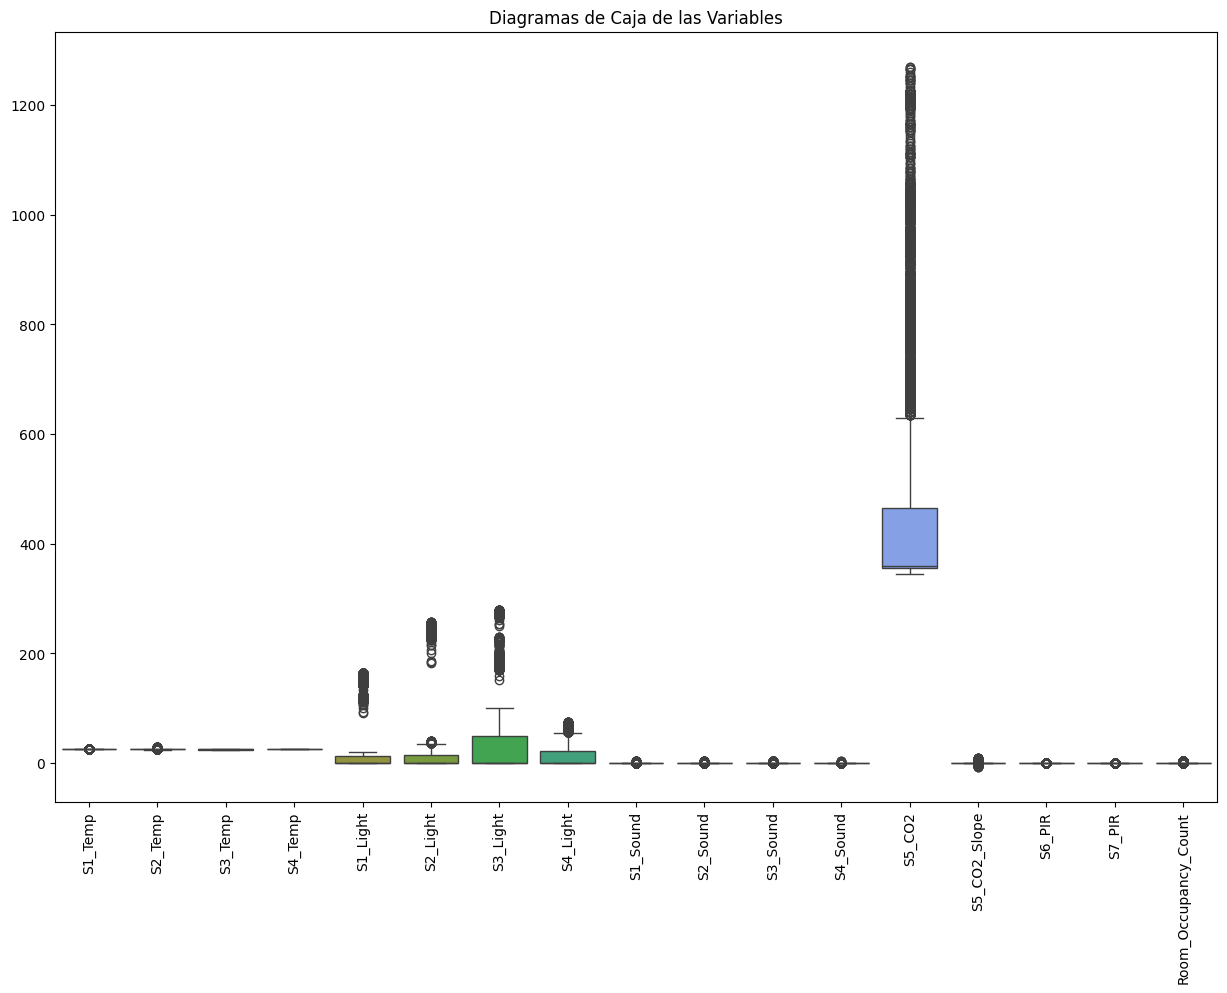

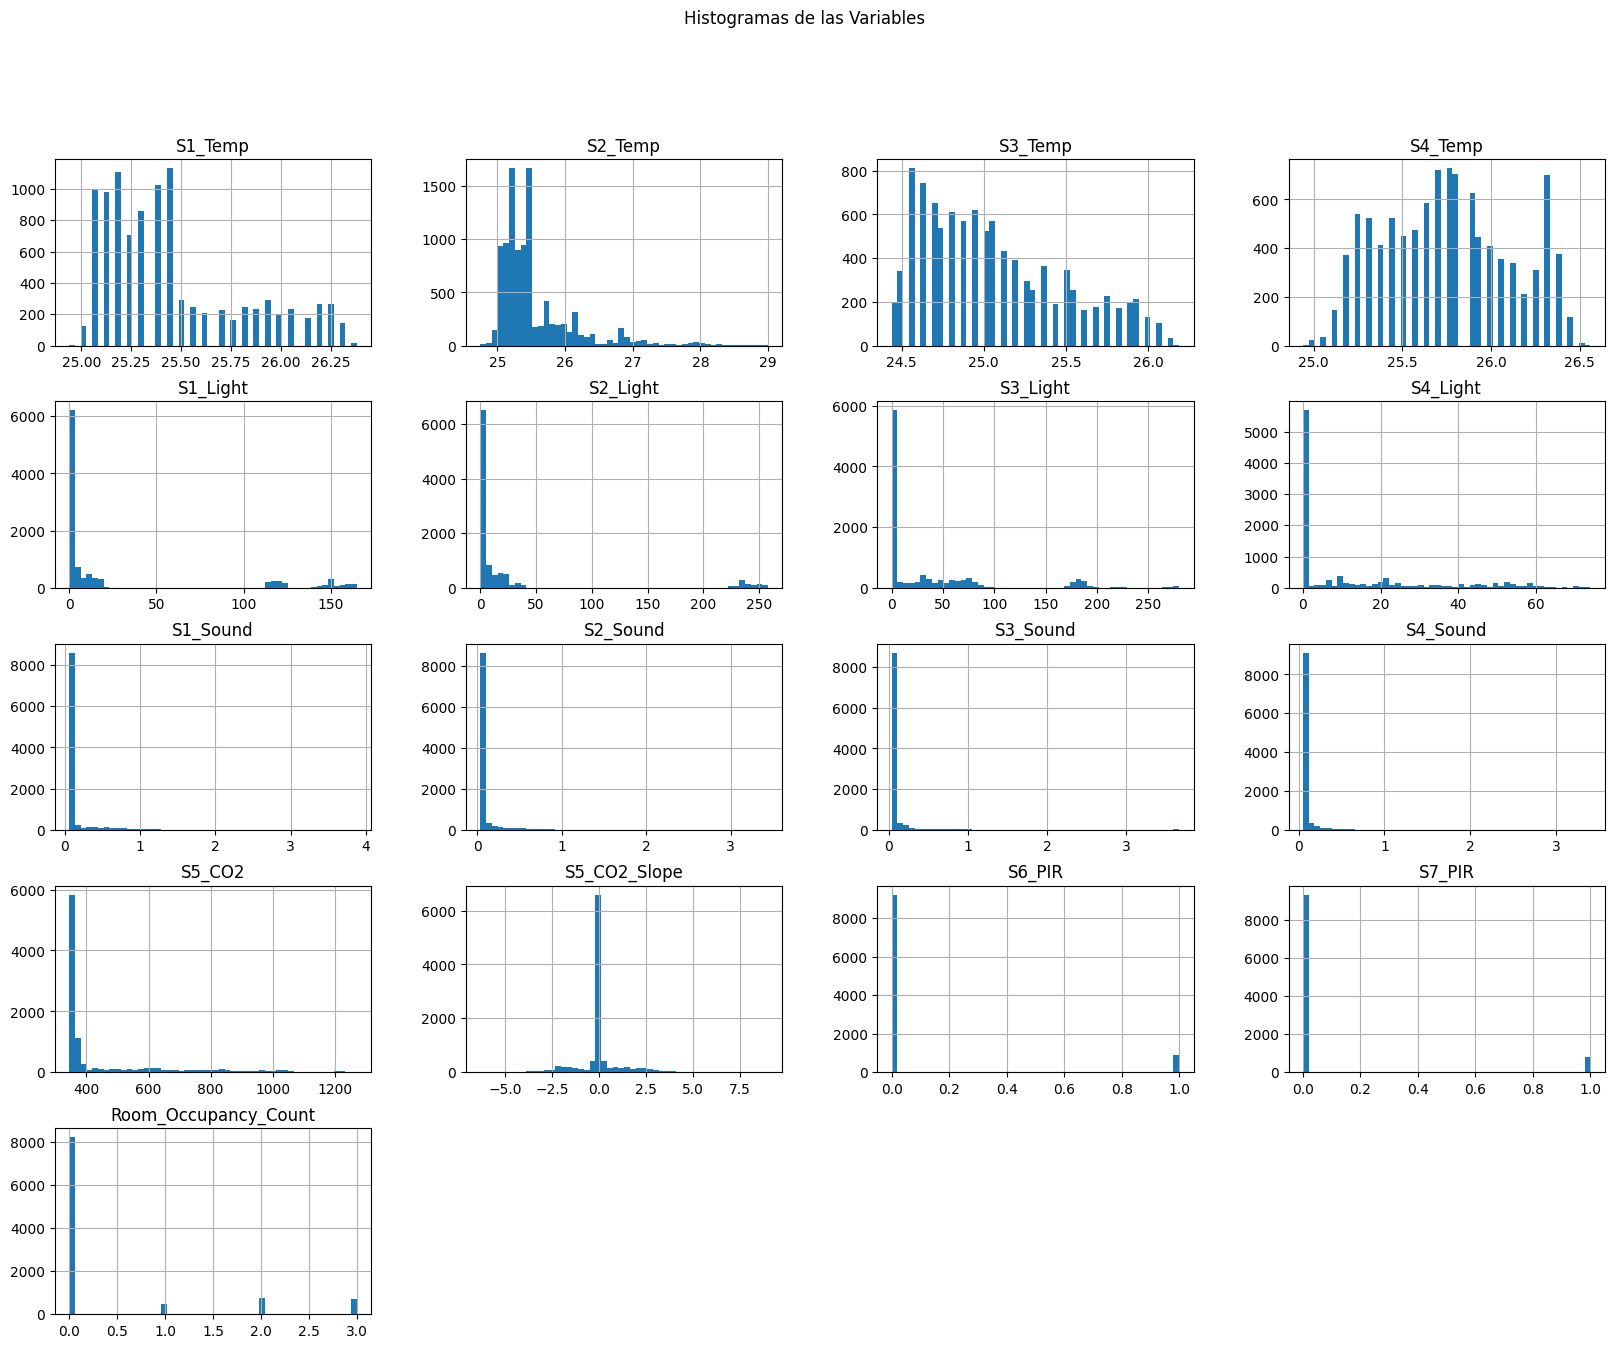

In [ ]:
# Visualización de Diagramas de Caja
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title('Diagramas de Caja de las Variables')
plt.show()

# Visualización de Histogramas
df.hist(bins=50, figsize=(20, 15))
plt.suptitle('Histogramas de las Variables')
plt.show()

## Dispersion atravez del tiempo

In [ ]:
df['Date'].unique()

array(['2017/12/22', '2017/12/23', '2017/12/24', '2017/12/25',
       '2017/12/26', '2018/01/10', '2018/01/11'], dtype=object)

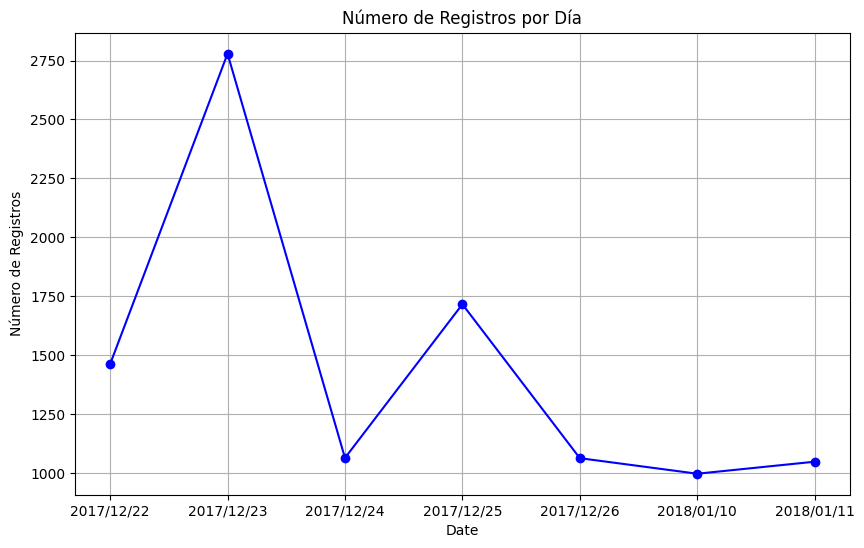

In [ ]:
# Agrupar por fecha y contar el número de registros para cada día
conteos_diarios = df.groupby('Date').size().reset_index(name='count')
# Graficar
plt.figure(figsize=(10, 6))
plt.plot(conteos_diarios['Date'], conteos_diarios['count'], marker='o', linestyle='-', color='b')
plt.title('Número de Registros por Día')
plt.xlabel('Date')
plt.ylabel('Número de Registros')
plt.grid(True)
plt.show()

## Categorizacion de los datos

In [ ]:
# Convertir la columna 'Date' y 'Time' a un solo objeto de fecha y hora
df['Date_time'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

# Extraer la nueva columna 'Date_time' y luego insertarla en la tercera posición
dt_time = df.pop('Date_time')
df.insert(2, 'Date_time', dt_time)


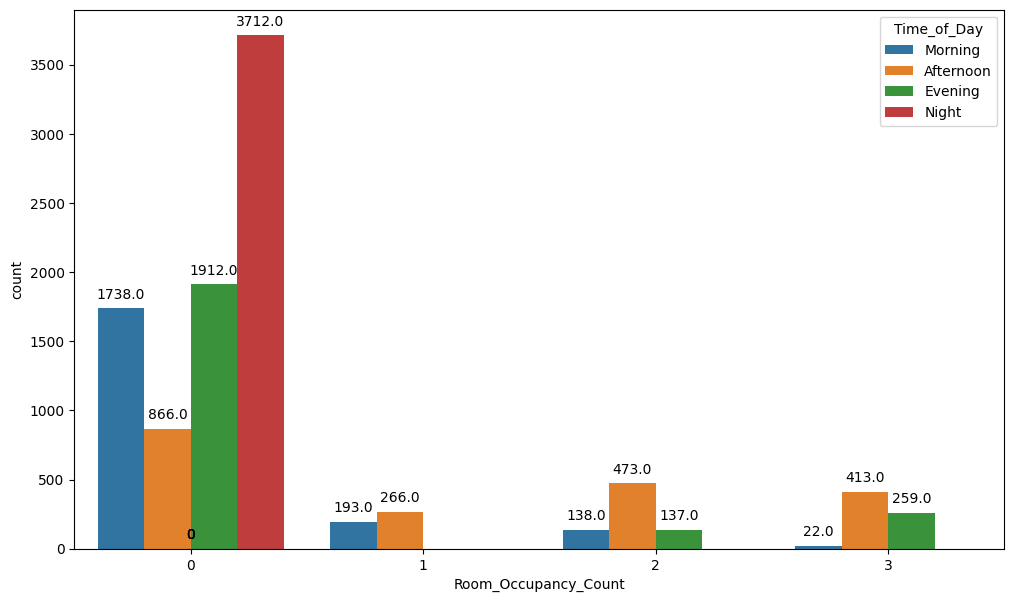

In [ ]:
# Crear una nueva columna 'Hours' que contiene la hora del día a partir de 'Date_time'
df['Hours'] = df['Date_time'].dt.hour

# Crear la columna 'Time_of_Day' que categoriza la hora del día en segmentos ('Night', 'Morning', 'Afternoon', 'Evening', 'Night')
df['Time_of_Day'] = pd.cut(df['Hours'], bins=[0, 6, 12, 17, 22, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening', 'Night'], include_lowest=True, ordered=False)

# Eliminar la columna 'Hours' ya que no se necesita después de la categorización
df.pop('Hours')

# Extraer la columna 'Time_of_Day' y luego insertarla en la tercera posición
day_time = df.pop('Time_of_Day')
df.insert(2, 'Time_of_Day', day_time)

# Graficar la cantidad de ocupaciones de sala según el momento del día
plt.figure(figsize=(12, 7))
ax = sns.countplot(data=df, x='Room_Occupancy_Count', hue='Time_of_Day', hue_order=['Morning', 'Afternoon', 'Evening', 'Night'])
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

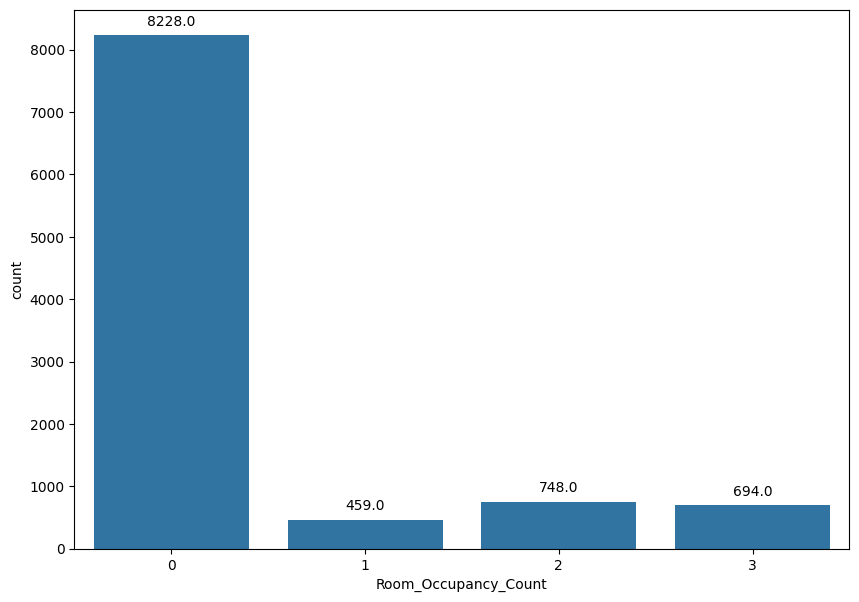

In [ ]:
plt.figure(figsize=(10,7))
ax = sns.countplot(data = df,x = 'Room_Occupancy_Count')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

## Implementacion del modelo Regresion Logistica

In [ ]:




# Convertir las columnas de tipo datetime en características numéricas
# Asegúrate de cambiar 'datetime_column' al nombre real de tu columna datetime
if 'Date_time' in df.columns:
    df['Date_time'] = pd.to_datetime(df['Date_time'])
    df['hour'] = df['Date_time'].dt.hour
    df['day_of_week'] = df['Date_time'].dt.dayofweek
    df['month'] = df['Date_time'].dt.month
    df['year'] = df['Date_time'].dt.year
    df = df.drop('Date_time', axis=1)

# Convertir las columnas categóricas a variables dummy
df = pd.get_dummies(df, drop_first=True)

# Separar las características (features) y el objetivo (target)
# La columna 'Room_Occupancy_Count' es la variable que queremos predecir
# y el resto de las columnas son las características
X = df.drop('Room_Occupancy_Count', axis=1)
y = df['Room_Occupancy_Count']

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión logística
model = LogisticRegression(max_iter=1000)

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f'Classification Report:\n{class_report}')
print(f'Accuracy: {accuracy}')



Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1619
           1       0.99      0.71      0.82       103
           2       0.70      0.82      0.75       164
           3       0.73      0.56      0.63       140

    accuracy                           0.94      2026
   macro avg       0.85      0.77      0.80      2026
weighted avg       0.94      0.94      0.94      2026

Accuracy: 0.9397828232971372


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
